In [150]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Reshape
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

In [137]:
model = MinMaxScaler(feature_range=(0,1))

In [143]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [144]:
X_train, X_test = X_train.astype(float)/255, X_test.astype(float)/255

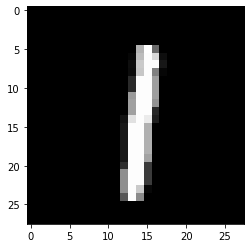

In [148]:
plt.imshow(X_train[40], cmap="gray")

In [160]:
in_layer = Input(shape=(28,28))
l1 = Reshape(target_shape=(784,))(in_layer)
l2 = Dense(units=100, activation="relu")(l1)
l3 = Dense(units=30, activation="relu")(l2)
l4 = Dense(units=100, activation="relu")(l3)
l5 = Dense(units=784, activation="relu")(l4)

out_layer = Reshape(target_shape=(28,28))(l5)

In [161]:
model = Model(in_layer, out_layer)

In [162]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_22 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_23 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_24 (Dense)             (None, 784)               79184     
_________________________________________________________________
reshape_5 (Reshape)          (None, 28, 28)            0   

In [163]:
model.compile(optimizer="adam", loss="mse")

In [164]:
model.fit(X_train, X_train, batch_size=200, epochs=20)

Epoch 1/20
300/300 [==============================] - 2s 5ms/step - loss: 0.0355
Epoch 2/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0208
Epoch 3/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0193
Epoch 4/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0184
Epoch 5/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0177
Epoch 6/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0174
Epoch 7/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0172
Epoch 8/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0170
Epoch 9/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0167
Epoch 10/20
300/300 [==============================] - 1s 4ms/step - loss: 0.0165
Epoch 11/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0163
Epoch 12/20
300/300 [==============================] - 1s 5ms/step - loss: 0.0161
Epoch 13/20
300/300 [====

In [165]:
gen = model.predict(X_mod[:10])